<a href="https://colab.research.google.com/github/OdysseusPolymetis/enssib_class/blob/main/5_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stanza

In [2]:
import os
import gensim
from gensim.models import Word2Vec
import glob
import nltk
import stanza

from lxml import etree as ET
import lxml.html
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from transformers import pipeline

sentiment_pipe = pipeline("text-classification", model="ac0hik/Sentiment_Analysis_French")

In [4]:
data = ["Je ne sais pas", "je me sens à l'aise"]
sentiment_pipe(data)

[{'label': 'neutral', 'score': 0.7620067596435547},
 {'label': 'positive', 'score': 0.7345632910728455}]

In [ ]:
!wget https://raw.githubusercontent.com/ebalzac/FC/refs/heads/gh-pages/balzac-22-FC-pere-goriot.xml

In [6]:
def strip_ns_prefix(tree):
    query = "descendant-or-self::*[namespace-uri()!='']"
    for element in tree.xpath(query):
        element.tag = ET.QName(element).localname
    return tree

In [7]:
filepath_of_text = "/content/balzac-22-FC-pere-goriot.xml"

In [ ]:
nlp_stanza = stanza.Pipeline(lang='fr', processors='tokenize,mwt')

In [9]:
parser = ET.XMLParser(remove_blank_text=True, resolve_entities=False, encoding='utf8')
tree = strip_ns_prefix(ET.parse(filepath_of_text, parser))
ps = tree.xpath(".//p")
paragraphs= []
for p in ps:
  sentences = []
  for sentence in nlp_stanza("".join(p.itertext())).sentences:
    sentences.append(sentence.text)
  paragraphs.append(sentences)

In [ ]:
len(paragraphs)

In [ ]:
paragraph_sentiments = []
for paragraph in paragraphs:
  sentence_scores = []
  for sentence in paragraph:
    sentiment = sentiment_pipe(sentence)[0]
    sentence_scores.append(sentiment['score'])
  paragraph_sentiments.append(np.mean(sentence_scores))

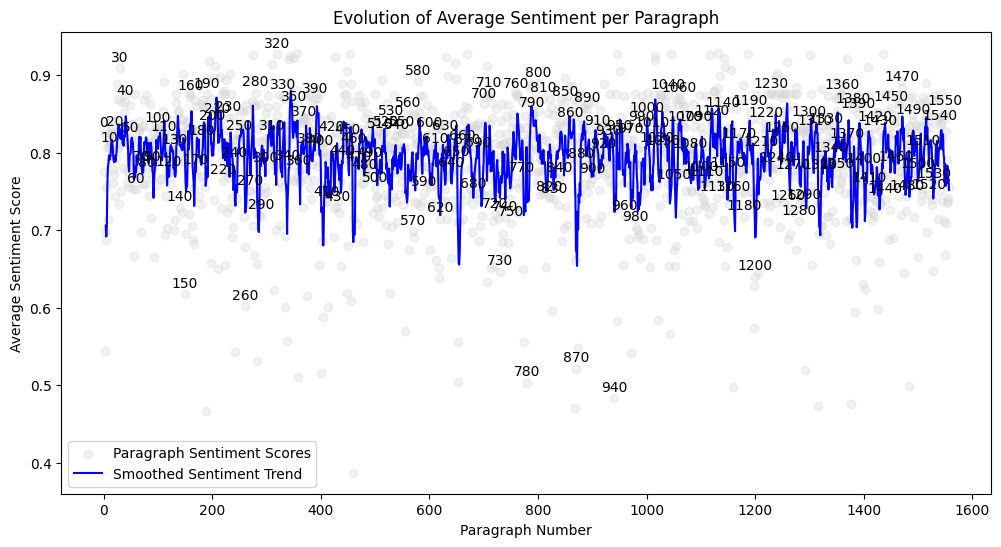

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

window_size = 10
smoothed_sentiments = np.convolve(paragraph_sentiments, np.ones(window_size), 'valid') / window_size

plt.figure(figsize=(12, 6))

plt.scatter(range(len(paragraph_sentiments)), paragraph_sentiments, alpha=0.3, color='lightgray', label='Paragraph Sentiment Scores')

plt.plot(range(window_size - 1, len(paragraph_sentiments)), smoothed_sentiments, color='blue', label='Smoothed Sentiment Trend')

plt.xlabel('Paragraph Number')
plt.ylabel('Average Sentiment Score')
plt.title('Evolution of Average Sentiment per Paragraph')
plt.legend()

for i, sentiment in enumerate(paragraph_sentiments):
    if i % 10 == 0:
      plt.annotate(str(i), (i, sentiment), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

In [ ]:
def display_paragraphs(indices):
  """Displays paragraphs based on given indices."""
  for i in indices:
    if 0 <= i < len(paragraphs):
      print(f"Paragraph {i}:")
      for sentence in paragraphs[i]:
        print(sentence)
    else:
      print(f"Index {i} is out of bounds.")

display_paragraphs([940])

Paragraph 940:
Et il tomba roide mort.
